In [70]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy import stats

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import Lasso,Ridge

# data gathering

In [2]:
data =load_diabetes()


In [3]:
df=pd.DataFrame(data.data , columns= data.feature_names)
df["target"] = data.target

In [4]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [6]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


<Axes: ylabel='Density'>

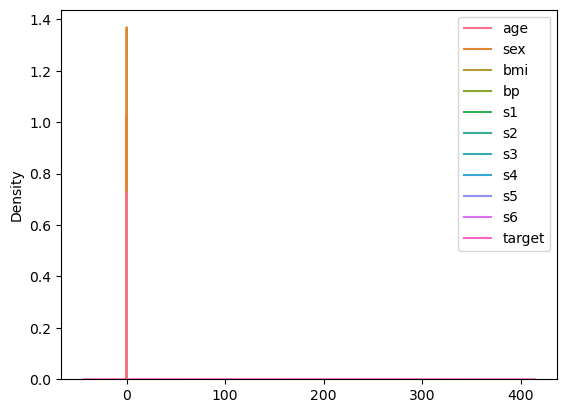

In [7]:
sns.kdeplot(df)

<Axes: >

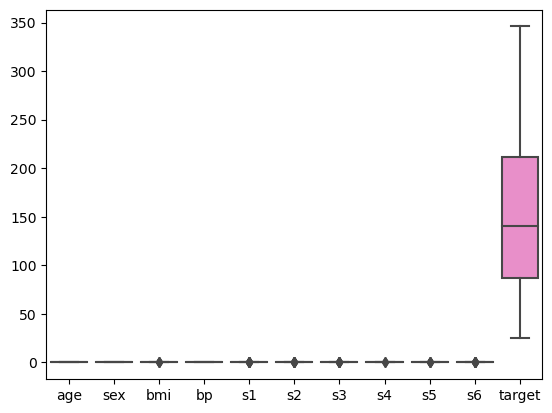

In [8]:
sns.boxplot(df)

# outliers

# column(bmi)

<Axes: xlabel='bmi'>

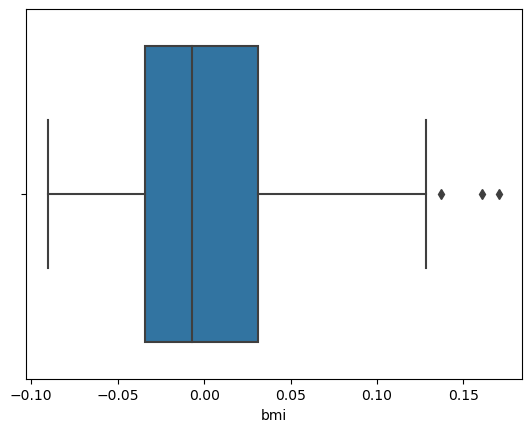

In [9]:
sns.boxplot(x=df["bmi"])

In [10]:
outliers = stats.zscore(df["bmi"])
outliers

0      1.297088
1     -1.082180
2      0.934533
3     -0.243771
4     -0.764944
         ...   
437    0.413360
438   -0.334410
439   -0.334410
440    0.821235
441   -1.535374
Name: bmi, Length: 442, dtype: float64

<Axes: xlabel='bmi', ylabel='Density'>

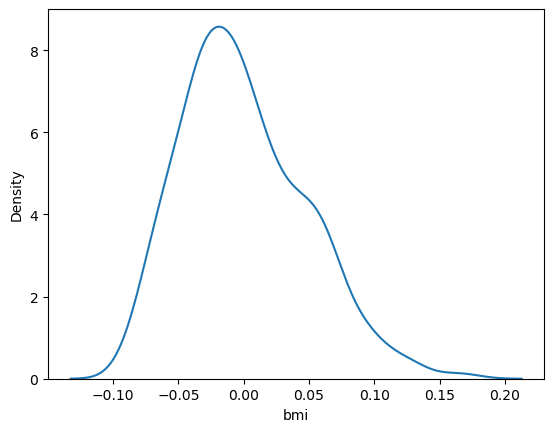

In [11]:
sns.kdeplot(df["bmi"])

In [12]:
upper_tail = df['bmi'].mean() + 2.7* df['bmi'].std()
lower_tail = df['bmi'].mean() - 2.7 *  df['bmi'].std()


In [13]:
upper_tail

0.12857142857142834

In [14]:
lower_tail

-0.12857142857142878

In [15]:
df["bmi"] = np.where(df["bmi"]>upper_tail,upper_tail,np.where(df["bmi"]<lower_tail,lower_tail,df["bmi"]))

<Axes: xlabel='bmi'>

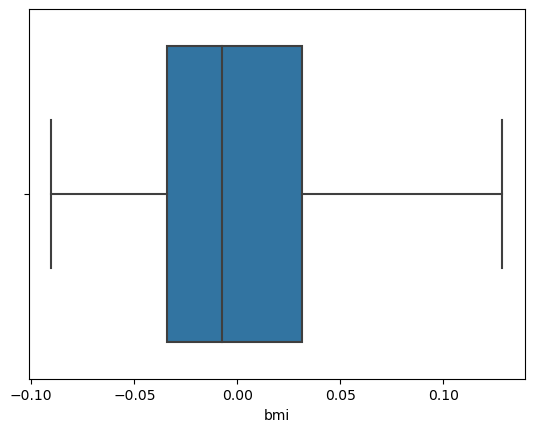

In [16]:
sns.boxplot(x =df["bmi"])

# column (S1)

<Axes: xlabel='s1'>

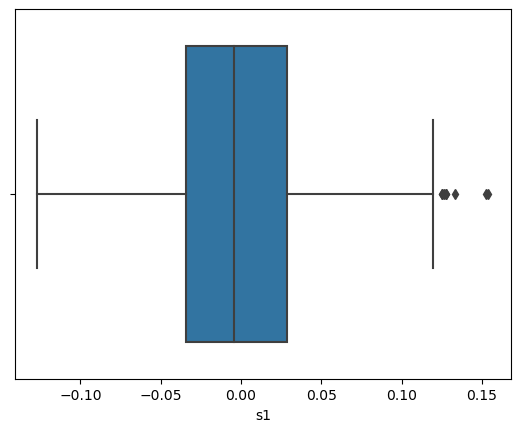

In [17]:
sns.boxplot(x=df["s1"])

In [18]:
outliers = stats.zscore(df["s1"])
thresh = 3
df.loc[outliers >thresh]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
123,0.005383,0.05068,0.034751,-0.001091,0.152538,0.198788,-0.061809,0.185234,0.015568,0.073480,84.0
230,-0.038207,0.05068,0.071397,-0.057313,0.153914,0.155887,0.000779,0.071948,0.050281,0.069338,220.0


In [19]:
upper_tail = df["s1"].mean()+ 2.5 * df["s1"].std()
lower_tail = df["s1"].mean()- 2.5 * df["s1"].std()

In [20]:
df["s1"] = np.where(df["s1"]>upper_tail,upper_tail,df["s1"])

<Axes: xlabel='s1'>

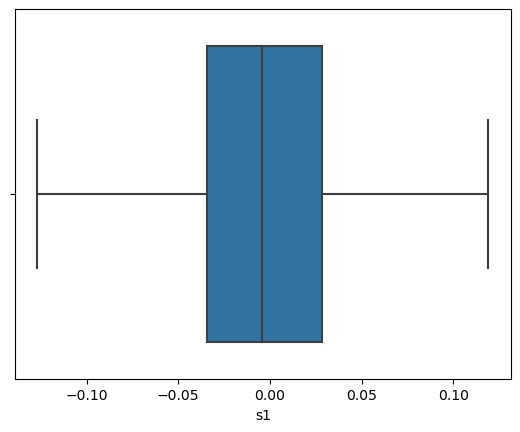

In [21]:
sns.boxplot(x=df["s1"])

# column (s2)

<Axes: xlabel='s2'>

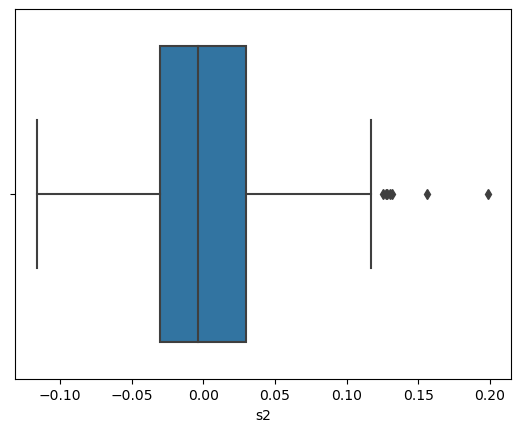

In [22]:
sns.boxplot(x =df["s2"])

In [23]:
outliers = stats.zscore(df["s2"])
thresh = 3
np.where(outliers>thresh)

(array([123, 230], dtype=int64),)

In [24]:
upper_tail =df["s2"].mean()+2.5*df["s2"].std()
lower_tail =df["s2"].mean()-2.5 *df["s2"].std()

In [25]:
df["s2"] =np.where(df["s2"]>upper_tail,upper_tail,np.where(df["bmi"]<lower_tail,lower_tail,df["s2"]))

<Axes: xlabel='s2'>

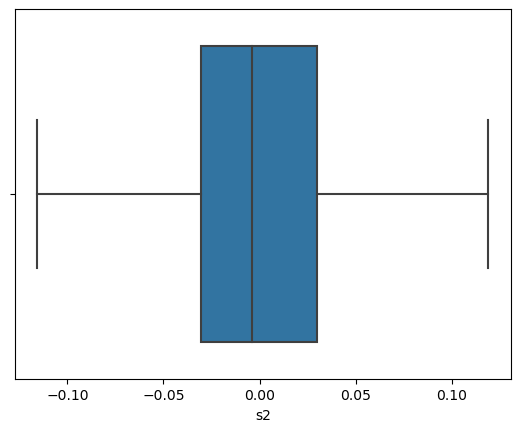

In [26]:
sns.boxplot(x =df["s2"])

# column (s3)

<Axes: xlabel='s3'>

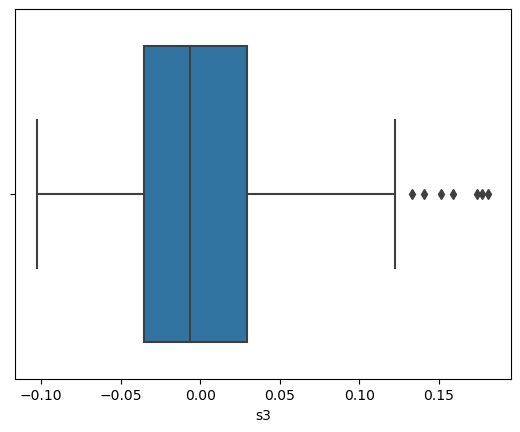

In [27]:
sns.boxplot(x=df["s3"])

In [28]:
outliers =stats.zscore(df["s3"])
thresh = 2.6
np.where(outliers>thresh)

(array([ 35,  58, 260, 261, 269, 286, 441], dtype=int64),)

In [29]:
upper_tail  =df["s3"].mean() +2.6 * df["s3"].std()
lower_tail  =df["s3"].mean() -2.6 * df["s3"].std()

In [30]:
df["s3"] = np.where(df["s3"]>upper_tail,upper_tail,np.where(df["s3"]<lower_tail,lower_tail,df["s3"]))

<Axes: xlabel='s3'>

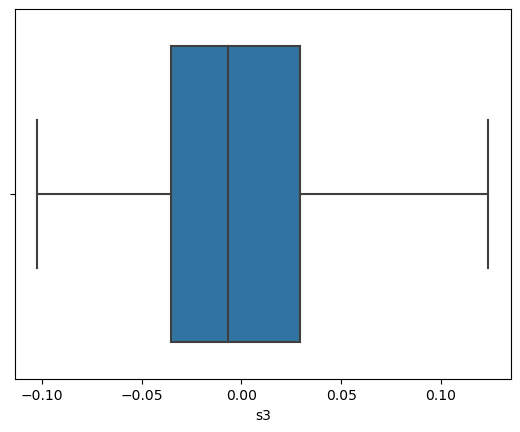

In [31]:
sns.boxplot(x = df["s3"])

# column (s4)

In [32]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,442.000000,4.420000e+02,442.000000,442.000000,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-0.000187,-4.797570e-17,-0.000271,-0.000370,-0.000567,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,0.047039,4.761905e-02,0.046866,0.046482,0.045841,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-0.090275,-1.123988e-01,-0.126781,-0.115613,-0.102307,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-0.034229,-3.665608e-02,-0.034248,-0.030358,-0.035117,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-0.007284,-5.670422e-03,-0.004321,-0.003819,-0.006584,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,0.031248,3.564379e-02,0.028358,0.029844,0.029312,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,0.128571,1.320436e-01,0.119048,0.119048,0.123810,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


<Axes: xlabel='s4'>

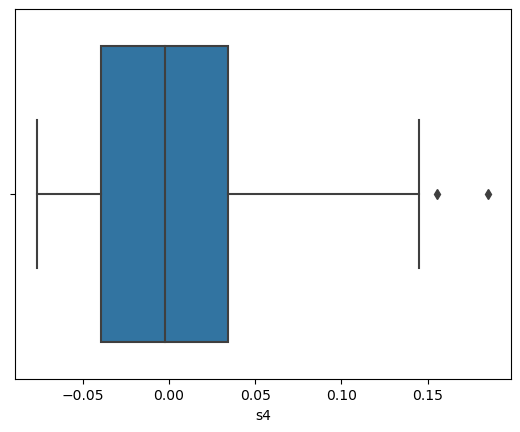

In [33]:
sns.boxplot(x =df["s4"])

In [34]:
outliers =stats.zscore(df["s4"])
thersh =3
np.where(outliers>thersh)

(array([123, 216, 322, 336], dtype=int64),)

In [35]:
upper_tail = df['s4'].mean()+3*df["s4"].std()
lower_tail = df['s4'].mean()-3*df["s4"].std()

In [36]:
df["s4"] = np.where(df["s4"]>upper_tail,upper_tail,np.where(df["s4"]<lower_tail,lower_tail,df["s4"]))

<Axes: xlabel='s4'>

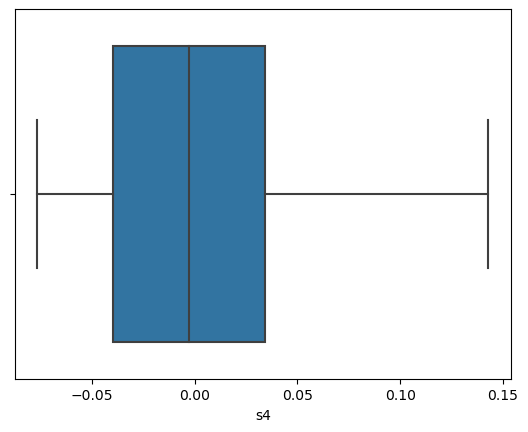

In [37]:
sns.boxplot(x= df["s4"])

# column (s5)

<Axes: xlabel='s5'>

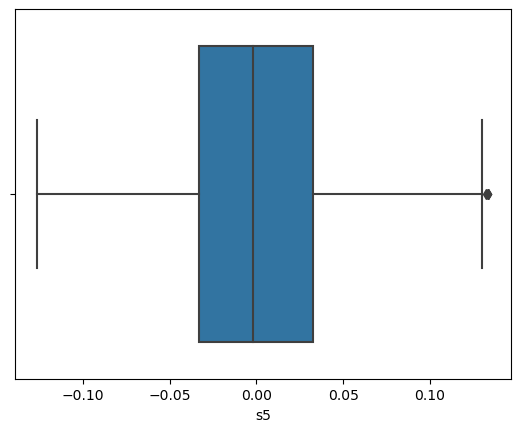

In [38]:
sns.boxplot(x =df["s5"])

In [39]:
outliers = stats.zscore(df["s5"])
thresh = 2.8
np.where(outliers>thresh)

(array([ 23, 169, 322], dtype=int64),)

In [40]:
upper_tail = df["s5"].mean()+2.7*df["s5"].std()
lower_tail = df["s5"].mean()-2.7*df["s5"].std()

In [41]:
df["s5"] = np.where(df["s5"]>upper_tail,upper_tail,np.where(df["s5"]<lower_tail,lower_tail,df["s5"]))

<Axes: xlabel='s5'>

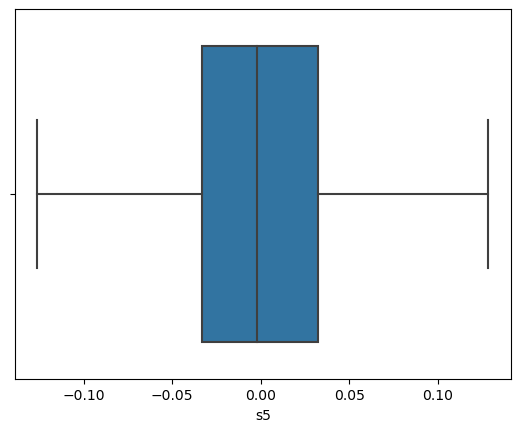

In [42]:
sns.boxplot(x=df["s5"])

# columns(s6)

<Axes: xlabel='s6', ylabel='Density'>

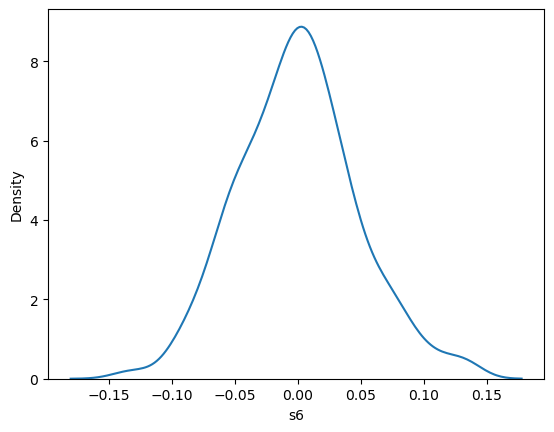

In [43]:
sns.kdeplot(df["s6"])

<Axes: xlabel='s6'>

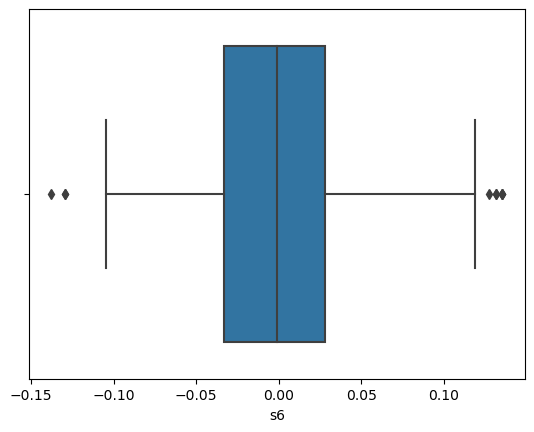

In [44]:
sns.boxplot(x= df["s6"])

In [45]:
outliers = stats.zscore(df["s6"])
thresh = 2.5
np.where(outliers>thresh)

(array([ 23, 117, 129, 141, 168, 208, 350, 428], dtype=int64),)

In [46]:
upper_tail =df['s6'].mean() +2.5 * df["s6"].std()
lower_tail =df["s6"].mean()-2.5 * df["s6"].std()

In [47]:
df["s6"] = np.where(df["s6"]>upper_tail,upper_tail,np.where(df["s6"]<lower_tail,lower_tail,df["s6"]))

<Axes: xlabel='s6'>

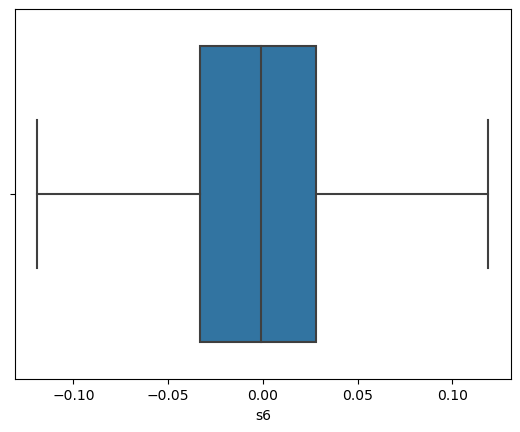

In [48]:
sns.boxplot(x=df["s6"])

<Axes: >

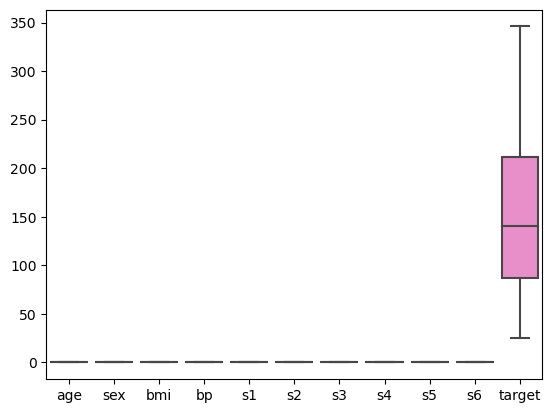

In [49]:
sns.boxplot(df) #### check outliers in data sets

# data split

In [50]:
x =df.drop("target", axis=1)
y= df["target"]

In [51]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=80)

In [53]:
x_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
18,-0.038207,-0.044642,-0.010517,-0.036656,-0.037344,-0.019476,-0.028674,-0.002592,-0.018114,-0.017646
86,-0.070900,0.050680,-0.075186,-0.040099,-0.051103,-0.015092,-0.039719,-0.002592,-0.096435,-0.034215
124,-0.005515,-0.044642,0.023973,0.008101,-0.034592,-0.038892,0.022869,-0.039493,-0.015999,-0.013504
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
330,0.009016,0.050680,0.030440,0.042529,-0.002945,0.036890,-0.065491,0.071210,-0.023647,0.015491
...,...,...,...,...,...,...,...,...,...,...
10,-0.096328,-0.044642,-0.083808,0.008101,-0.103389,-0.090561,-0.013948,-0.076395,-0.062917,-0.034215
211,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022517,-0.021788
422,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040673,-0.009362
188,0.005383,-0.044642,-0.002973,0.049415,0.074108,0.070710,0.044958,-0.002592,-0.001496,-0.009362


In [54]:
x_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
109,0.038076,0.050680,-0.009439,0.002351,0.001183,0.037517,-0.054446,0.050176,-0.025953,0.106617
387,-0.045472,-0.044642,0.015350,-0.074527,-0.049727,-0.017284,-0.028674,-0.002592,-0.104366,-0.075636
70,-0.001882,-0.044642,-0.069797,-0.012556,-0.000193,-0.009143,0.070730,-0.039493,-0.062917,0.040343
13,0.005383,0.050680,-0.001895,0.008101,-0.004321,-0.015719,-0.002903,-0.002592,0.038394,-0.013504
425,-0.078165,-0.044642,-0.040696,-0.081413,-0.100638,-0.112795,0.022869,-0.076395,-0.020292,-0.050783
...,...,...,...,...,...,...,...,...,...,...
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
96,0.056239,0.050680,0.009961,0.049415,-0.004321,-0.012274,-0.043401,0.034309,0.060791,0.032059
303,0.074401,-0.044642,0.034751,0.094172,0.057597,0.020293,0.022869,-0.002592,0.073799,-0.021788
103,0.059871,0.050680,0.041218,0.011544,0.041086,0.070710,-0.036038,0.034309,-0.010903,-0.030072


In [55]:
lr = LinearRegression()

In [56]:
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [58]:
train_result = pd.DataFrame({"actual":y_train,"predicted":y_pred_train})
train_result

,actual,predicted
18,97.0,146.498783
86,55.0,40.570808
124,121.0,167.084392
438,104.0,100.964380
330,244.0,180.168205
...,...,...
10,101.0,95.511706
211,70.0,169.901855
422,233.0,198.643257
188,141.0,154.809729


In [59]:
## evalution training
mse =mean_squared_error(y_train,y_pred_train)
mae = mean_absolute_error(y_train,y_pred_train)
r2 = r2_score(y_train,y_pred_train)
print(mse)
print(mae)
print(r2)

2859.2067222124306
43.40382592660661
0.5199988180219447


In [60]:
test_result = pd.DataFrame({"actual":y_test,"predicted":y_pred_test})
test_result

,actual,predicted
109,81.0,145.936842
387,201.0,84.075289
70,48.0,74.302915
13,185.0,164.459609
425,152.0,109.392740
...,...,...
121,173.0,199.685843
96,150.0,208.125373
303,236.0,227.580087
103,198.0,155.400220


In [61]:
## evalution testing
mse =mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
r2 = r2_score(y_test,y_pred_test)
print(mse)
print(mae)
print(r2)

2833.0228440973333
42.57999284921401
0.5052545119288121


In [63]:
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import Lasso,Ridge

In [65]:
lasso = Lasso()

In [66]:
lasso.fit(x_train,y_train)

Lasso()

In [68]:
y_pred_train = lasso.predict(x_train)


In [69]:
## evalution training
mse =mean_squared_error(y_train,y_pred_train)
mae = mean_absolute_error(y_train,y_pred_train)
r2 = r2_score(y_train,y_pred_train)
print(mse)
print(mae)
print(r2)

3861.1426243866745
52.637255967277476
0.35179467469307535


In [77]:
lasso = Lasso()
hyperparameter = ({"alpha":np.arange(80,81,0.001)})

In [78]:
gssv = GridSearchCV(lasso,hyperparameter,cv=5)
gssv

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([80.   , 80.001, 80.002, 80.003, 80.004, 80.005, 80.006, 80.007,
       80.008, 80.009, 80.01 , 80.011, 80.012, 80.013, 80.014, 80.015,
       80.016, 80.017, 80.018, 80.019, 80.02 , 80.021, 80.022, 80.023,
       80.024, 80.025, 80.026, 80.027, 80.028, 80.029, 80.03 , 80.031,
       80.032, 80.033, 80.034, 80.035, 80.036, 80.037, 80.038, 80.039,
       80.04 , 80.041,...
       80.944, 80.945, 80.946, 80.947, 80.948, 80.949, 80.95 , 80.951,
       80.952, 80.953, 80.954, 80.955, 80.956, 80.957, 80.958, 80.959,
       80.96 , 80.961, 80.962, 80.963, 80.964, 80.965, 80.966, 80.967,
       80.968, 80.969, 80.97 , 80.971, 80.972, 80.973, 80.974, 80.975,
       80.976, 80.977, 80.978, 80.979, 80.98 , 80.981, 80.982, 80.983,
       80.984, 80.985, 80.986, 80.987, 80.988, 80.989, 80.99 , 80.991,
       80.992, 80.993, 80.994, 80.995, 80.996, 80.997, 80.998, 80.999])})

In [79]:
gssv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([80.   , 80.001, 80.002, 80.003, 80.004, 80.005, 80.006, 80.007,
       80.008, 80.009, 80.01 , 80.011, 80.012, 80.013, 80.014, 80.015,
       80.016, 80.017, 80.018, 80.019, 80.02 , 80.021, 80.022, 80.023,
       80.024, 80.025, 80.026, 80.027, 80.028, 80.029, 80.03 , 80.031,
       80.032, 80.033, 80.034, 80.035, 80.036, 80.037, 80.038, 80.039,
       80.04 , 80.041,...
       80.944, 80.945, 80.946, 80.947, 80.948, 80.949, 80.95 , 80.951,
       80.952, 80.953, 80.954, 80.955, 80.956, 80.957, 80.958, 80.959,
       80.96 , 80.961, 80.962, 80.963, 80.964, 80.965, 80.966, 80.967,
       80.968, 80.969, 80.97 , 80.971, 80.972, 80.973, 80.974, 80.975,
       80.976, 80.977, 80.978, 80.979, 80.98 , 80.981, 80.982, 80.983,
       80.984, 80.985, 80.986, 80.987, 80.988, 80.989, 80.99 , 80.991,
       80.992, 80.993, 80.994, 80.995, 80.996, 80.997, 80.998, 80.999])})

In [75]:
gssv.best_estimator_

Lasso(alpha=0.001)

In [80]:
gssv.best_params_

{'alpha': 80.0}

In [81]:
lasso = Lasso(alpha= 80.0)

In [82]:
lasso.fit(x_train,y_train)

Lasso(alpha=80.0)

In [83]:
y_pred_train = lasso.predict(x_train)